# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


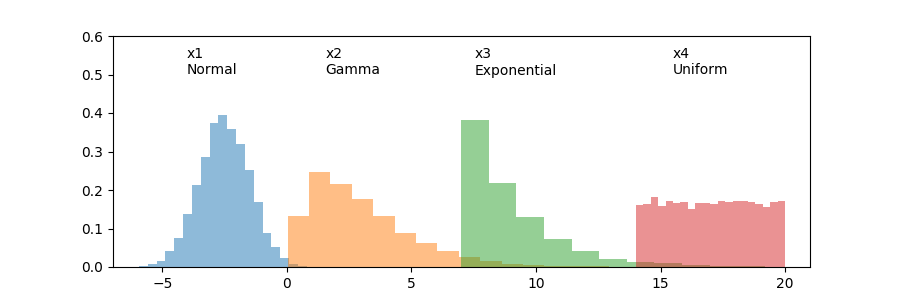

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


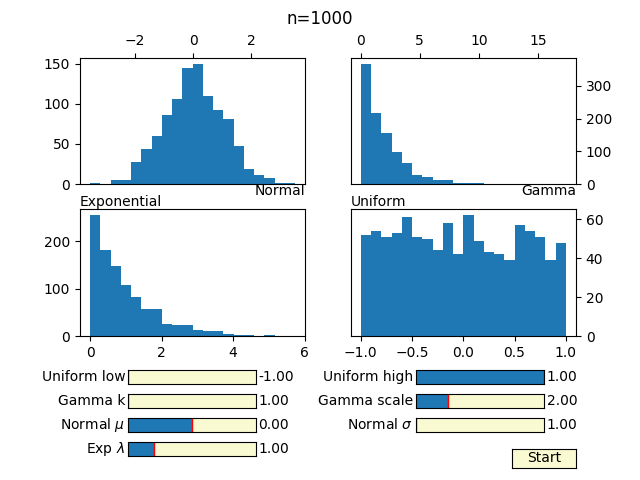

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.widgets import Slider

%matplotlib notebook

n0 = 100
n1 = 1000

#Create figure object
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
ax1.xaxis.set_ticks_position('top')
ax2.xaxis.set_ticks_position('top')
ax2.yaxis.set_ticks_position('right')
ax4.yaxis.set_ticks_position('right') 
plt.subplots_adjust(bottom=0.3)

#Create Sliders for parameters
axcolor = 'lightgoldenrodyellow'
axmu = plt.axes([0.20, 0.1, 0.20, 0.03], facecolor=axcolor)
axsd = plt.axes([0.65, 0.1, 0.20, 0.03], facecolor=axcolor)
axshape = plt.axes([0.20, 0.15, 0.20, 0.03], facecolor=axcolor)
axscale = plt.axes([0.65, 0.15, 0.20, 0.03], facecolor=axcolor)
axlam = plt.axes([0.20, 0.05, 0.20, 0.03], facecolor=axcolor)
axlow = plt.axes([0.20, 0.20, 0.20, 0.03], facecolor=axcolor)
axhigh = plt.axes([0.65, 0.20, 0.20, 0.03], facecolor=axcolor)

smu = Slider(axmu, 'Normal $\mu$', -1, 1, valinit=0)
ssd = Slider(axsd, 'Normal $\sigma$', 1, 5, valinit=1)
sshape = Slider(axshape, 'Gamma k', 1, 5, valinit=1)
sscale = Slider(axscale, 'Gamma scale', 1, 5, valinit=2)
slam = Slider(axlam, 'Exp $\lambda$', 0, 5, valinit=1)
slow = Slider(axlow, 'Uniform low', -1, -0.1, valinit=-1)
shigh = Slider(axhigh, 'Uniform high', 0.1, 1, valinit=1)

#Default distributions
dnormal = [np.random.normal(0, 1, n1)]
dgamma = [np.random.gamma(1, 2, n1)]
dexp = [np.random.exponential(1, n1)]
dunif = [np.random.uniform(-1,1, n1)]

#Updates distributions when sliders are changed
def updateDist(val):
    mu = smu.val
    sd = ssd.val
    dnormal[0] = np.random.normal(mu, sd, n1)
    shape = sshape.val
    scale = sscale.val
    dgamma[0] = np.random.gamma(shape, scale, n1)
    lam = slam.val
    dexp[0] = np.random.exponential(lam, n1)
    low = slow.val
    high = shigh.val
    dunif[0] = np.random.uniform(low,high, n1)
    
smu.on_changed(updateDist)
ssd.on_changed(updateDist)
sshape.on_changed(updateDist)
sscale.on_changed(updateDist)
slam.on_changed(updateDist)
slow.on_changed(updateDist)
shigh.on_changed(updateDist)

#updates plot on FuncAnimation call
def update(curr):
    if( curr == (n1-n0)/50 ):
        a[0].event_source.stop()
    ax1.clear()
    ax2.clear()
    ax3.clear()
    ax4.clear()
    ax1.hist(dnormal[0][:(n0+curr*50)],bins=20)
    ax2.hist(dgamma[0][:(n0+curr*50)],bins=20)
    ax3.hist(dexp[0][:(n0+curr*50)],bins=20)
    ax4.hist(dunif[0][:(n0+curr*50)],bins=20)
    plt.suptitle('n={}'.format(n0+curr*50))
    ax1.annotate('Normal', xy=(1, 0), xycoords='axes fraction',
                horizontalalignment='right', verticalalignment='top')
    ax2.annotate('Gamma', xy=(1, 0), xycoords='axes fraction',
                horizontalalignment='right', verticalalignment='top')
    ax3.annotate('Exponential', xy=(0, 1), xycoords='axes fraction',
                horizontalalignment='left', verticalalignment='bottom')
    ax4.annotate('Uniform', xy=(0, 1), xycoords='axes fraction',
                horizontalalignment='left', verticalalignment='bottom')
    fig.canvas.draw_idle()
    
#Define Start button and function to start animation
goax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(goax, 'Start', color=axcolor, hovercolor='0.975')    

a = [0]
def start(event):
    a[0] = animation.FuncAnimation(fig,update,interval=100)
button.on_clicked(start)

plt.show()